<a href="https://colab.research.google.com/github/mewadashreya/TopicModelingwithLDA/blob/main/TopicModelingwithLDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import re, numpy as np, pandas as pd
from pprint import pprint
import pandas as pd
import pickle

# Gensim
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim import corpora
import matplotlib.pyplot as plt

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
nltk.download('wordnet')
import pickle
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
%matplotlib inline
#PyLDAvis
import pyLDAvis 
import pyLDAvis.gensim 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=8f8a2088a4ad91bdc675cd260b1b4d304d0c157ea08ff834ec22780900ef6d41
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [58]:
imUsingColab = False

if imUsingColab:
    !pip install gensim
    !pip install pyLDAvis
    !pip install vega
    !pip install altair

In [2]:
!pip install chart_studio
import matplotlib as plt
from plotly.offline import iplot
import plotly.graph_objs as go
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

     |████████████████████████████████| 71kB 2.1MB/s 


In [3]:
import warnings 
warnings.filterwarnings('ignore')
import plotly.io as pio
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30

from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
pio.renderers
pio.renderers.default = 'colab'

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/tripadvisor_hotel_reviews.csv')

In [5]:
dataset[0:5]

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
dataset.columns

Index(['Review', 'Rating'], dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [8]:
df2 = pd.DataFrame({'Rating':['1', '2', '3', '4', '5'], 'count':[len(dataset[(dataset['Rating'] == 1)]), len(dataset[(dataset['Rating'] == 2)]), 
len(dataset[(dataset['Rating'] == 3)]), len(dataset[(dataset['Rating'] == 4)]), len(dataset[(dataset['Rating'] == 5)])]})

In [9]:
data = pd.DataFrame({'Rating':['1','2','3','4','5'],'count':[len(dataset[(dataset['Rating'] == 1)]),len(dataset[(dataset['Rating'] == 2)]),len(dataset[(dataset['Rating'] == 3)]),len(dataset[(dataset['Rating'] == 4)]),len(dataset[(dataset['Rating'] == 5)])]})

In [10]:
fig = px.bar(df2, y="count",x="Rating",color="Rating",
             color_discrete_map={
                "1": "red",
                "2": "green",
                "3": "blue",
                "4": "goldenrod",
                "5": "magenta"},
             title="Rating of the Apps Distribution",
             template="plotly_dark"
            )
fig.show()

In [11]:
dataset

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [12]:
dataset['review_len'] = dataset['Review'].str.len()

In [13]:
dataset[0:5]

,Review,Rating,review_len
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


In [14]:
dataset['word_count'] = dataset['Review'].apply(lambda x: len(str(x).split()))
dataset[0:5]

,Review,Rating,review_len,word_count
0,nice hotel expensive parking got good deal sta...,4,593,87
1,ok nothing special charge diamond member hilto...,2,1689,250
2,nice rooms not 4* experience hotel monaco seat...,3,1427,217
3,"unique, great stay, wonderful time hotel monac...",5,600,89
4,"great stay great stay, went seahawk game aweso...",5,1281,191


In [15]:
dataset["review_len"].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Length Distribution')

In [16]:
dataset["word_count"].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Length Distribution')

In [17]:
df_4_5 = dataset[(dataset['Rating'] == 4) | (dataset['Rating'] == 5)]

In [18]:
print("Number of reviews for ratings 4 + 5: ", len(df_4_5))

Number of reviews for ratings 4 + 5:  15093


In [19]:
df_1_2 = dataset[(dataset['Rating'] == 1) | (dataset['Rating'] == 2)]

In [20]:
print("Number of reviews for ratings 1 + 2: ", len(df_1_2))

Number of reviews for ratings 1 + 2:  3214


In [21]:

import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

In [22]:
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS

def word_tokens(x):
    try:
      doc = nlp(x)
      
      def remove_stopwords(doc):
          token_list = [token.text for token in doc]
          return [word for word in token_list if nlp.vocab[word].is_stop == False]
        
      sentence = " ".join(remove_stopwords(doc)) # stopwords
      sentence = " ".join([token.lemma_ for token in doc])  # lemmatization
      sentence = ''.join([c for c in sentence if c not in punctuation]) # punctuation removal

      return sentence 
    except:
      pass

df_4_5['Review'] = df_4_5.Review.str.lower()
df_4_5['Body_Filter'] = df_4_5['Review'].apply(lambda x : word_tokens(x)) 
df_4_5 = df_4_5[df_4_5.Body_Filter.isna() == False]

        
      

In [23]:
df_4_5

,Review,Rating,review_len,word_count,Body_Filter
0,nice hotel expensive parking got good deal sta...,4,593,87,nice hotel expensive parking get good deal sta...
3,"unique, great stay, wonderful time hotel monac...",5,600,89,unique great stay wonderful time hotel monac...
4,"great stay great stay, went seahawk game aweso...",5,1281,191,great stay great stay go seahawk game awesome...
5,love monaco staff husband stayed hotel crazy w...,5,1002,134,love monaco staff husband stay hotel crazy wee...
6,"cozy stay rainy city, husband spent 7 nights m...",5,748,101,cozy stay rainy city husband spend 7 night mo...
...,...,...,...,...,...
20480,great play stay stay loyal inn package deal ha...,5,256,33,great play stay stay loyal inn package deal ha...
20482,great choice wife chose best western quite bit...,5,716,105,great choice wife choose best western quite bi...
20483,good bed clean convenient just night happy sta...,4,420,61,good bed clean convenient just night happy sta...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,109,best keep secret 3rd time stay charm not 5sta...


In [24]:
df_1_2['Review'] = df_1_2.Review.str.lower()
df_1_2['Body_Filter'] = df_1_2['Review'].apply(lambda x : word_tokens(x)) 
df_1_2 = df_1_2[df_1_2.Body_Filter.isna() == False]

In [25]:
df_1_2

,Review,Rating,review_len,word_count,Body_Filter
1,ok nothing special charge diamond member hilto...,2,1689,250,ok nothing special charge diamond member hilto...
10,"poor value stayed monaco seattle july, nice ho...",2,333,47,poor value stay monaco seattle july nice hote...
15,horrible customer service hotel stay february ...,1,1411,214,horrible customer service hotel stay february ...
16,disappointed say anticipating stay hotel monac...,2,1662,242,disappointed say anticipate stay hotel monaco ...
24,great location need internally upgrade advanta...,2,250,35,great location nee internally upgrade advantag...
...,...,...,...,...,...
20484,deceptive staff deceptive desk staff claiming ...,2,695,102,deceptive staff deceptive desk staff claim not...
20485,not impressed unfriendly staff checked asked h...,2,616,87,not impress unfriendly staff check ask high fl...
20488,"ok just looks nice modern outside, desk staff ...",2,443,63,ok just look nice modern outside desk staff n...
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,781,hotel theft ruin vacation hotel open sept 17 2...


In [26]:
from collections import Counter
positive_count = Counter()
negative_count = Counter()

for ind in df_4_5.index:
    positive_count.update(df_4_5['Body_Filter'][ind].lower().split())

for ind in df_1_2.index:
    negative_count.update(df_1_2['Body_Filter'][ind].lower().split())

In [27]:
len(list(positive_count.keys()))

54146

In [28]:
len(list(negative_count.keys()))

23647

In [29]:
positive_count_df = pd.DataFrame(positive_count.most_common(20))
positive_count_df.columns = ['positive_count','count']

In [30]:
# positive_count_df
positive_count_df.style.background_gradient()

,positive_count,count
0,hotel,38659
1,room,30850
2,stay,20675
3,not,19418
4,great,18276
5,good,16005
6,staff,12595
7,nt,12374
8,do,11269
9,nice,9601


In [31]:
negative_count_df = pd.DataFrame(negative_count.most_common(20))
negative_count_df.columns = ['negative_count','count']

In [32]:
negative_count_df.style.background_gradient()

,negative_count,count
0,room,9855
1,not,9614
2,hotel,8412
3,stay,4512
4,do,4072
5,nt,4038
6,no,3597
7,day,2751
8,night,2687
9,good,2582


<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Positive Topic Most Used Words')

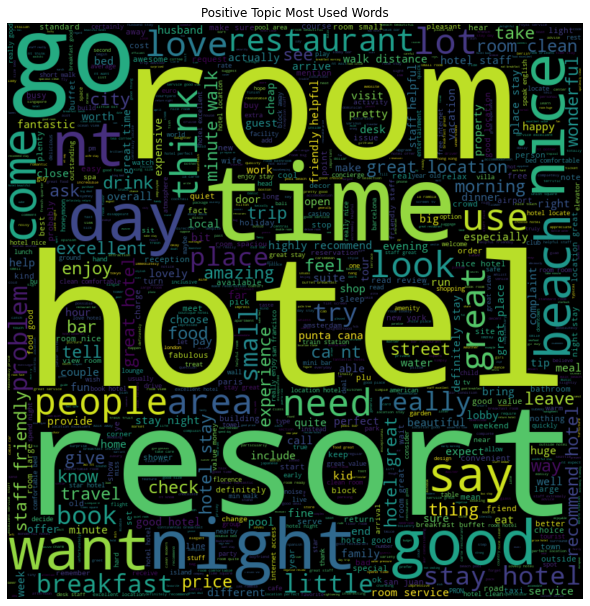

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color="black",width = 800, height = 800, stopwords = STOPWORDS, 
                      max_words=1000).generate("".join(list(df_4_5.Body_Filter)))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Positive Topic Most Used Words")
plt.show() 

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Negative Topic Most Used Words')

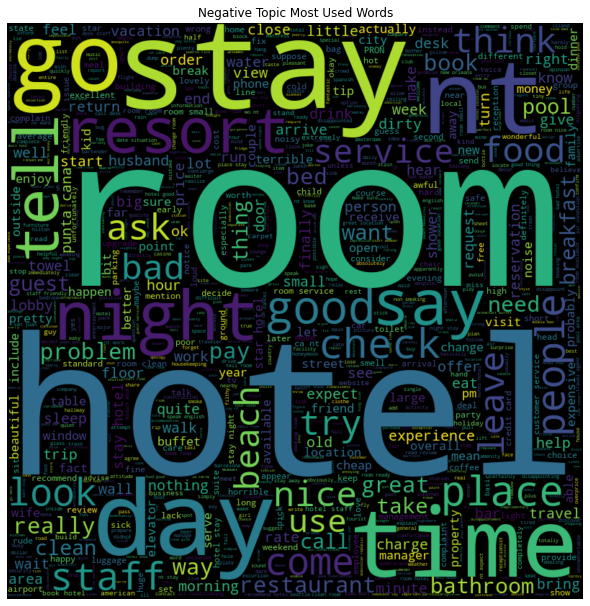

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color="black",width = 800, height = 800, stopwords = STOPWORDS, 
                      max_words=1000).generate("".join(list(df_1_2.Body_Filter)))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Negative Topic Most Used Words")
plt.show() 

In [45]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in (stop)])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    more_than_4letters = ' '.join(word for word in punc_free.split() if len(word)>4)
    return more_than_4letters

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub("[^a-zA-Z]", " ", str(sent)) 
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        yield(sent)  

In [49]:
data = df_4_5.Body_Filter.values.tolist()

data_words = sent_to_words(data)

data_ready = [clean(doc).split() for doc in data_words]

In [50]:
data_ready

[['hotel',
  'expensive',
  'parking',
  'hotel',
  'anniversary',
  'arrive',
  'evening',
  'advice',
  'previous',
  'review',
  'valet',
  'parking',
  'check',
  'quick',
  'little',
  'disappointed',
  'existent',
  'clean',
  'comfortable',
  'stiff',
  'pillow',
  'soundproof',
  'music',
  'night',
  'morning',
  'closing',
  'people',
  'hallway',
  'maybe',
  'noisy',
  'neighbor',
  'aveda',
  'product',
  'goldfish',
  'touch',
  'advantage',
  'longer',
  'location',
  'great',
  'distance',
  'shopping',
  'overall',
  'experience',
  'parking',
  'night'],
 ['unique',
  'great',
  'wonderful',
  'hotel',
  'monaco',
  'location',
  'excellent',
  'short',
  'stroll',
  'downtown',
  'shopping',
  'friendly',
  'animal',
  'smell',
  'monaco',
  'suite',
  'sleeping',
  'stripe',
  'curtain',
  'closed',
  'touch',
  'goldfish',
  'brandi',
  'enjoy',
  'partake',
  'coffee',
  'service',
  'lobby',
  'think',
  'great',
  'feature',
  'great',
  'staff',
  'friendly',
 

In [51]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [52]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [41]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for number_of_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [54]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

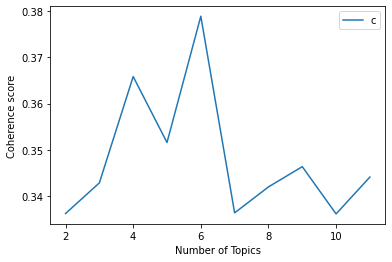

In [63]:
start,stop,step=2,12,1
plot_graph(data_ready, start,stop,step)

In [64]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, #stream of document vectors
                                           id2word=id2word, #mapping from word ID to words
                                           num_topics=7, #number of requested topics
                                           random_state=100,
                                           update_every=1,
                                           chunksize=15, #number of documents to be used in each training chunk
                                           passes=10, #number of passes through corpus
                                           alpha='symmetric',
                                           iterations=100, #iterations through corpus
                                           per_word_topics=True) 

print(lda_model.print_topics(num_words=15))

Streaming output truncated to the last 5000 lines.

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.6/dist-pa

[(0, '0.025*"holiday" + 0.022*"different" + 0.013*"breeze" + 0.012*"world" + 0.012*"birthday" + 0.011*"terrace" + 0.011*"truly" + 0.010*"favorite" + 0.010*"month" + 0.009*"superb" + 0.009*"honeymoon" + 0.009*"dollar" + 0.009*"thank" + 0.008*"season" + 0.008*"smile"'), (1, '0.068*"lovely" + 0.023*"bedroom" + 0.017*"luxury" + 0.016*"surprise" + 0.015*"apartment" + 0.013*"suite" + 0.013*"totally" + 0.012*"river" + 0.012*"chocolate" + 0.010*"beautifully" + 0.010*"usual" + 0.010*"inclusive" + 0.009*"ceiling" + 0.009*"patio" + 0.009*"pleasantly"'), (2, '0.037*"villa" + 0.037*"weekend" + 0.034*"property" + 0.015*"kitchen" + 0.013*"french" + 0.013*"green" + 0.013*"charm" + 0.011*"villas" + 0.010*"boston" + 0.010*"ticket" + 0.009*"fully" + 0.008*"funky" + 0.007*"pleasure" + 0.007*"celebrate" + 0.007*"pizza"'), (3, '0.174*"hotel" + 0.037*"great" + 0.036*"location" + 0.032*"breakfast" + 0.030*"staff" + 0.021*"clean" + 0.020*"helpful" + 0.019*"excellent" + 0.018*"comfortable" + 0.017*"friendly" + 

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.



In [65]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1599.5, -0.5)

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1599.5, -0.5)

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1599.5, -0.5)

Text(0.5, 1.0, 'Topic 4')

(-0.5, 2499.5, 1599.5, -0.5)

Text(0.5, 1.0, 'Topic 5')

(-0.5, 2499.5, 1599.5, -0.5)

Text(0.5, 1.0, 'Topic 6')

(-0.5, 2499.5, 1599.5, -0.5)

Text(0.5, 1.0, 'Topic 7')

(-0.5, 2499.5, 1599.5, -0.5)

(-0.5, 2499.5, 1599.5, -0.5)

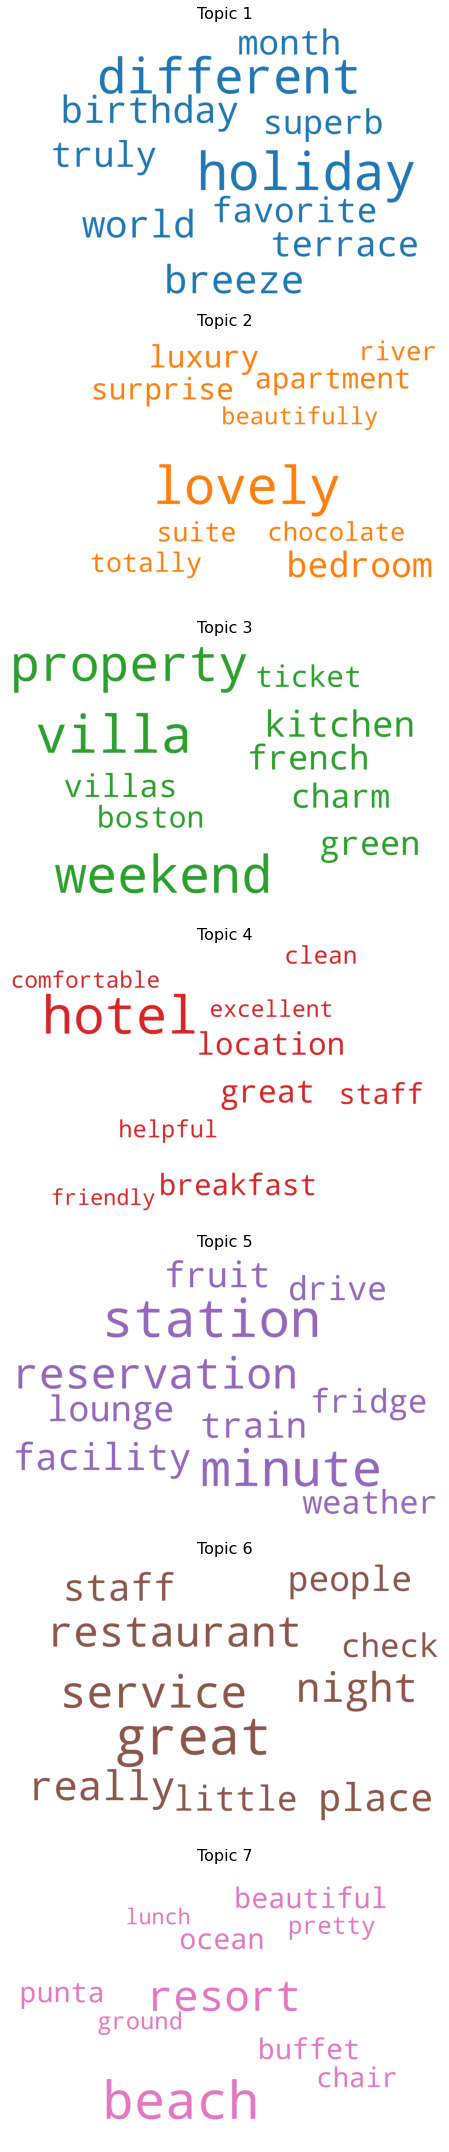

In [66]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1600,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(7,1, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()